# Atividade prática 1 - Agrupamento Nebuloso 

Matheus Brito Faria 

Número de matricula: 2017074386

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from functools import partial
import random
from PIL import Image
import matplotlib.image as mpimg
from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm
np.random.seed(42)

%matplotlib inline

## Fuzzy C Means Algorithm 

Para realizar o algoritmo Fuzzy C Means, inicialmente, é populada a matriz de partição de tamanho número de amostras X número de clusters com valores aleatórios onde a soma da linha precisa ser igual a um. O intuito dessa matriz é obter o quão proximo cada amostra está de cada cluster.

Posteriormente o algoritmo entra em looping com uma sequencia de eventos:

*   Cálculo dos centroides

    É calculado os centroides de cada cluster. O calculo é feito de forma ponderada com a matriz de partição, de forma que o grau de similaridade com cada cluster tenha relevância no algoritmo.

*   Atualização da matriz de partição

    A matriz de partição é atualizada com novos valores de acordo com a seguinte formula:

    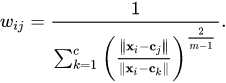

    Lembrando que as linhas da matriz precisam continuar somando um.

    É montada uma matriz com a distancia de cada amostra até seu centroide de forma a execução do código fique mais rápida.

*  Cálculo da função de custo

    De forma a analisar se o algoritmo convergiu, é feito o calculo da função de custo. 




In [ ]:
class FuzzyCMeans():
    def __init__(self, data, k, m=2):
        """
        Inicializa as variaveis
        """
        self.data = data
        self.k = k
        self.m = m
        self.len_data = len(data)
        self.num_features = data.shape[1]
        self.partitions = np.zeros([self.len_data, k])
        self.shape_partitions = self.partitions.shape
        self.centroids = np.zeros([self.k, self.num_features])
        self.idx = np.zeros(self.len_data)
        self.list_dist = None
        self.cost_function_value = list()


    def calc_centroids(self):
        """
        Calcula os centoides
        """
        for i in range(self.k):
            self.centroids[i] = self.partitions[:, i].dot(self.data)/np.sum(self.partitions[:, i])


    def update_partitions(self):
        """
        Atualiza a matriz U
        """
        partitions_new = np.zeros(self.shape_partitions)
        self.list_dist = cdist(self.data, self.centroids)
        sum_dist = self.list_dist.sum(axis=1)

        for i in range(self.data.shape[0]):
            for k in range(self.centroids.shape[0]):
                partitions_new[i][k] = 1 / ((self.list_dist[i][k]/sum_dist[i]) ** (2/(self.m-1)))

            partitions_new[i, :] = partitions_new[i, :] / np.sum(partitions_new[i, :])
        
        self.partitions = partitions_new

    def cost_function(self):
        """
        Calcula o valor da funcao de custo
        """
        return np.multiply(self.partitions**self.m, self.list_dist**2).sum()


    def fit(self, max_iter = 10):
        """
        Executa o algoritmo com um numero maximo de interacoes
        """
        # inicializacao aleatoria da matriz de partições
        for i in range(self.len_data):
            self.rnd = np.random.random(self.k)
            self.partitions[i] = self.rnd/sum(self.rnd)

        for i in tqdm(range(max_iter)):

            self.calc_centroids()

            self.update_partitions()

            self.cost_function_value.append(self.cost_function())

        
        self.idx = [np.argmax(self.partitions[i], axis=0) for i in range(self.len_data)]

        return self.idx, self.centroids, self.cost_function_value


In [35]:
class FuzzyCMeans():
    def __init__(self, data, k, m=2):
        """
        Inicializa as variaveis
        """
        self.data = data
        self.k = k
        self.m = m
        self.len_data = len(data)
        self.num_features = data.shape[1]
        self.partitions = np.zeros([self.len_data, k])
        self.shape_partitions = self.partitions.shape
        self.centroids = np.zeros([self.k, self.num_features])
        self.idx = np.zeros(self.len_data)
        self.list_dist = None
        self.cost_function_value = list()


    def calc_centroids(self):
        """
        Calcula os centoides
        """
        for i in range(self.k):
            self.centroids[i] = self.partitions[:, i].dot(self.data)/np.sum(self.partitions[:, i])


    def update_partitions(self):
        """
        Atualiza a matriz U
        """
        partitions_new = np.zeros(self.shape_partitions)
        self.list_dist = cdist(self.data, self.centroids)

        for i in range(self.data.shape[0]):
            for k in range(self.centroids.shape[0]):
                value_den = 0
                for kk in range(self.centroids.shape[0]):
                    value_den += ((self.list_dist[i][k]/self.list_dist[i][kk]) ** (2/(self.m-1)))
                partitions_new[i][k] = 1/value_den

            partitions_new[i, :] = partitions_new[i, :] / np.sum(partitions_new[i, :])
        
        self.partitions = partitions_new

    def cost_function(self):
        """
        Calcula o valor da funcao de custo
        """
        return np.multiply(self.partitions**self.m, self.list_dist**2).sum()


    def fit(self, max_iter = 10):
        """
        Executa o algoritmo com um numero maximo de interacoes
        """
        # inicializacao aleatoria da matriz de partições
        for i in range(self.len_data):
            self.rnd = np.random.random(self.k)
            self.partitions[i] = self.rnd/sum(self.rnd)

        for i in tqdm(range(max_iter)):

            self.calc_centroids()

            self.update_partitions()

            self.cost_function_value.append(self.cost_function())

        
        self.idx = [np.argmax(self.partitions[i], axis=0) for i in range(self.len_data)]

        return self.idx, self.centroids, self.cost_function_value


Código para usar os arquivos via Google Drive, caso o script esteja rodando em um Goole Colaboratory.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Navegando nos diretórios dentro do Google Drive.

In [4]:
%cd /content/drive/MyDrive/UFMG/8º SEMESTRE/SISTEMAS NEBULOSOS/tp-1

/content/drive/MyDrive/UFMG/8º SEMESTRE/SISTEMAS NEBULOSOS/tp-1


## Validação do algoritmo no FCMdataset

Abrindo o arquivo e plotando os dados.

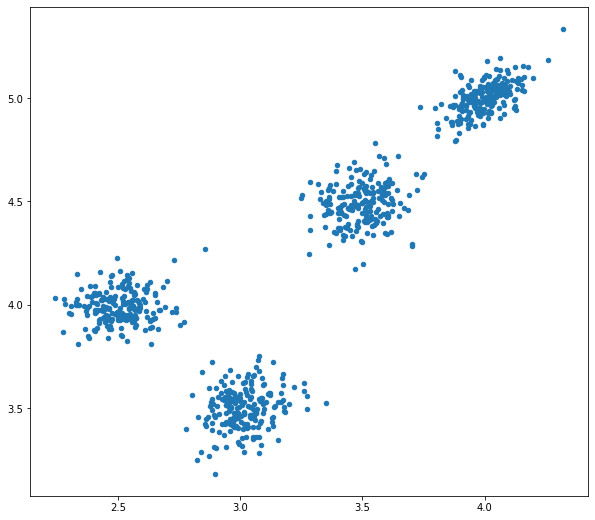

In [36]:
data = loadmat('fcm_dataset.mat')
data = pd.DataFrame(data['x'])
data = data.values

plt.figure(figsize=(10, 9))
plt.scatter(data[:,0], data[:,1], s=20)
plt.show()

Executando o algoritmo e plotando os dados, separando por cores os clusteres e em preto está o centroide.

Também é plotado o comportamento do função de custo.

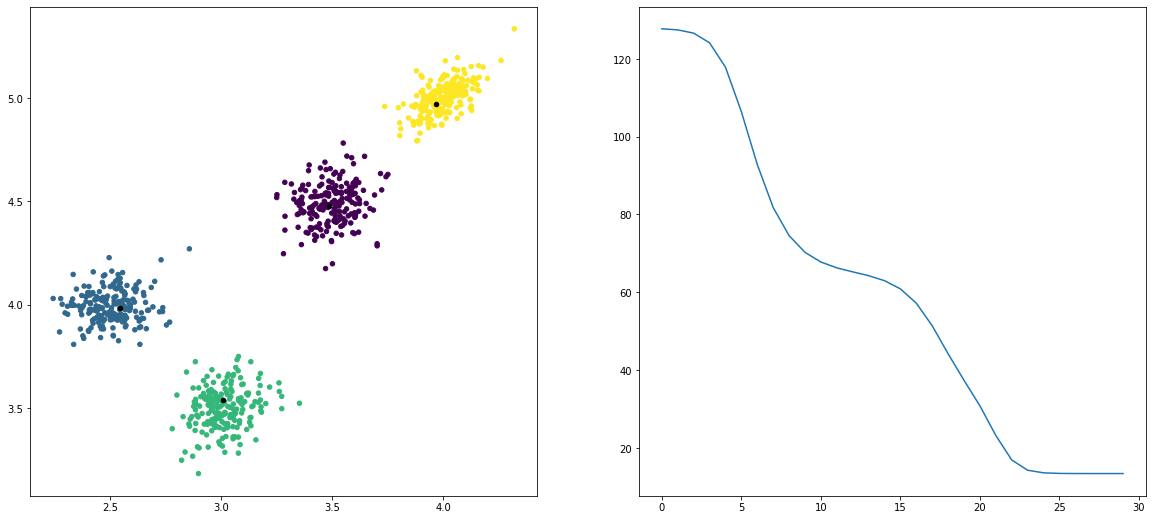

In [37]:
fuzzy_c_means = FuzzyCMeans(data, 4)
idx, centroids, list_cost = fuzzy_c_means.fit(max_iter=30)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
axes[0].scatter(data[:,0], data[:,1], s=20, c=idx)
axes[0].scatter(centroids[:, 0], centroids[:, 1], s=20, color='black')
axes[1].plot(range(len(list_cost)), list_cost)
fig.show()

## Segmentação de imagens

Códigos úteis para a manipulação das imagens

In [38]:
def photo_open(filename, rescale=1):
    photo = Image.open(filename)
    photo = photo.convert('RGB')
    photo = photo.resize( ( int(photo.size[0]/rescale), int(photo.size[1]/rescale) ), Image.ANTIALIAS)
    return photo


def pick_pixels(photo):
    n , m = photo.size
    ibagem = []
    pixels = photo.load()
    for i in range(n):
        for j in range(m):
            ibagem.append(list(pixels[i,j]) )
    return pd.DataFrame(ibagem)
    

def coloring(photo, labels, centers, rescale=1):
    n, m = photo.size
    pixels = photo.load()
    for i in range(n):
        for j in range(m):
            numb = [int(number) for number in centers[labels[i*m + j]] ] 
            pixels[i,j]= tuple(numb)
    photo = photo.resize( (int( photo.size[0]*rescale), int(photo.size[1]*rescale)), Image.ANTIALIAS)
    return photo

Para cada imagem foi feita uma análise visual para estipular o número de clusteres, posteriormente o algoritmo foi executado até ser observar uma convergência da função de custo

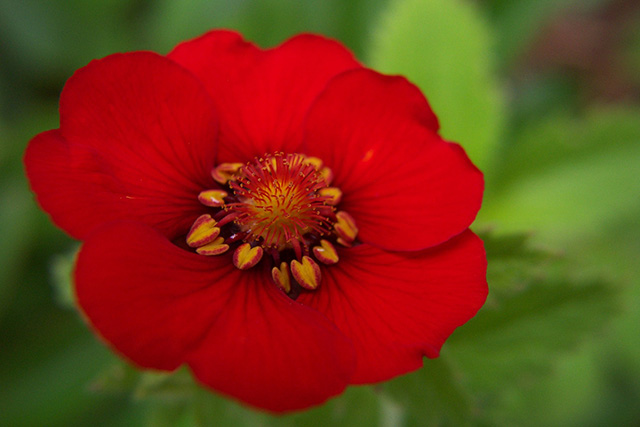

In [20]:
filename = 'ImagensTeste/photo001.jpg'
photo = photo_open(filename)
photo

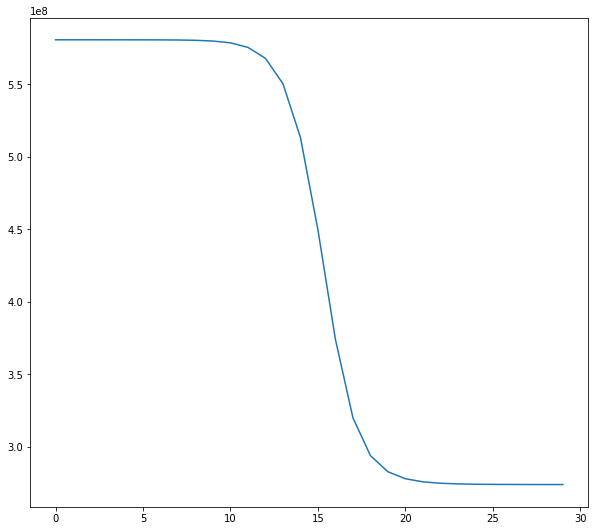

In [21]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 3)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=30)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

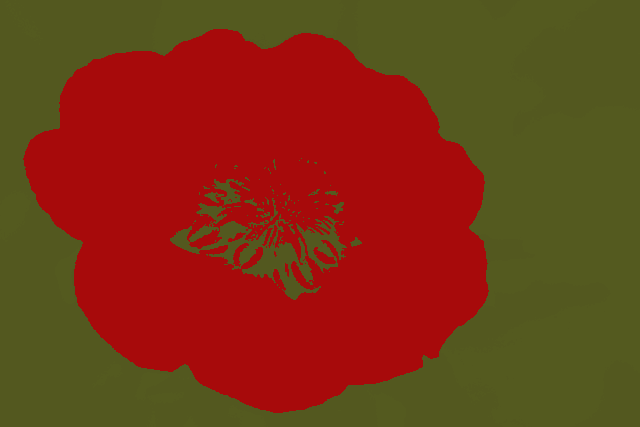

In [22]:
photo

## Imagem 2

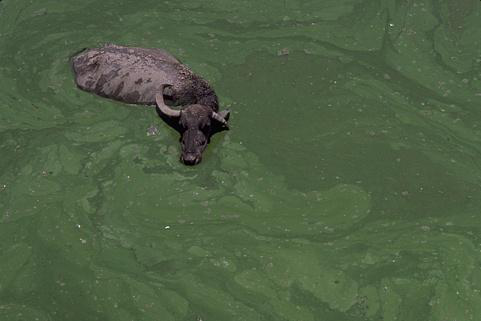

In [48]:
filename = 'ImagensTeste/photo002.jpg'
photo = photo_open(filename)
photo

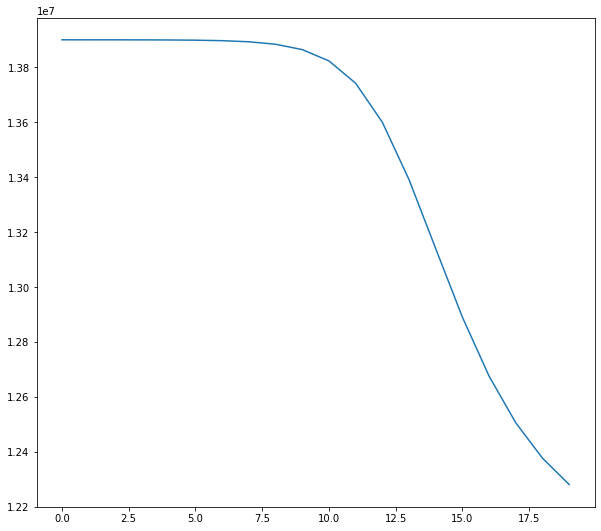

In [49]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 5)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=20)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

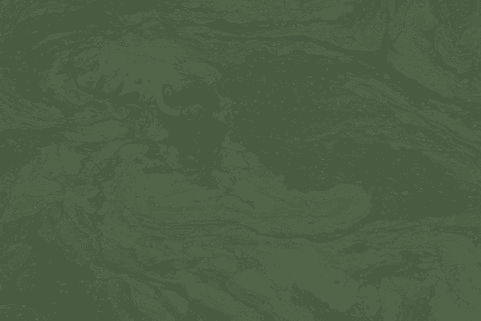

In [47]:
photo

## Imagem 3

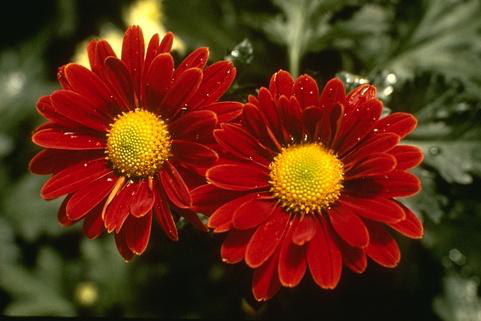

In [50]:
filename = 'ImagensTeste/photo003.jpg'
photo = photo_open(filename)
photo

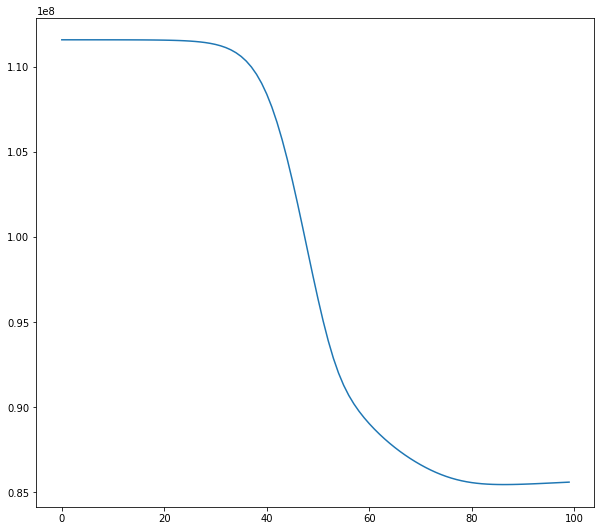

In [ ]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 10)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=100)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

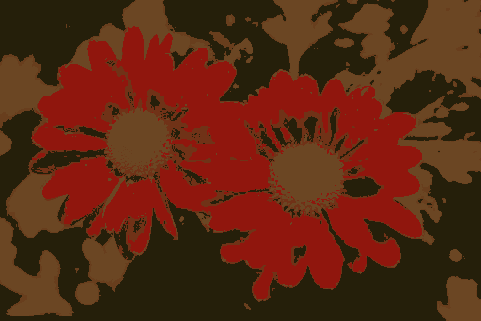

In [ ]:
photo

## Imagem 4

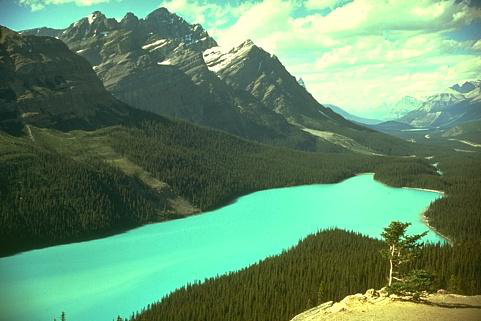

In [ ]:
filename = 'ImagensTeste/photo004.jpg'
photo = photo_open(filename)
photo

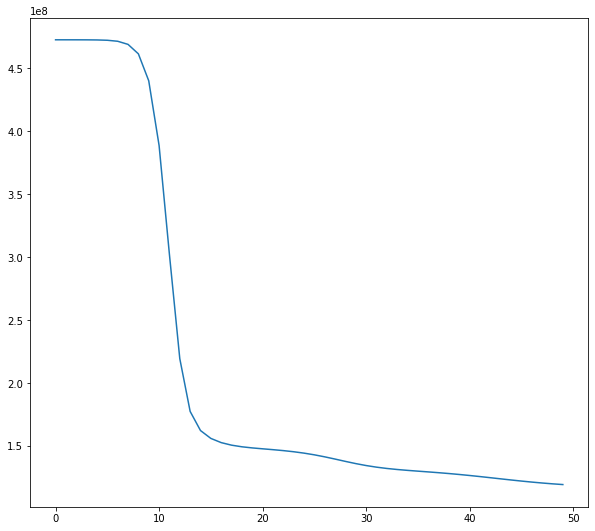

In [ ]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 5)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=50)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

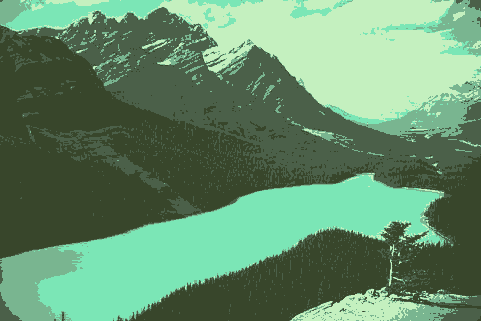

In [ ]:
photo

## Imagem 5

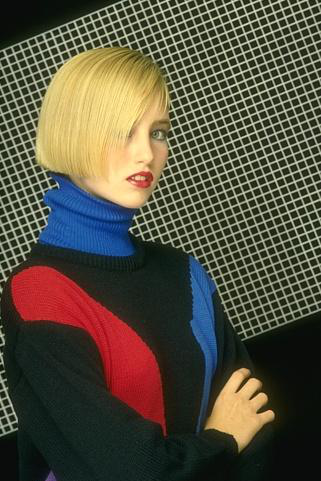

In [ ]:
filename = 'ImagensTeste/photo005.jpg'
photo = photo_open(filename)
photo

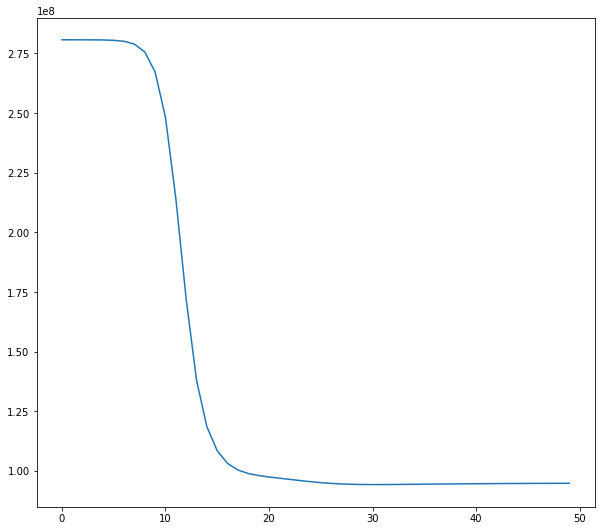

In [ ]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 7)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=50)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

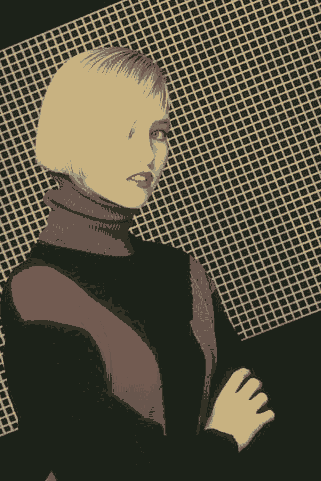

In [ ]:
photo

## Imagem 6

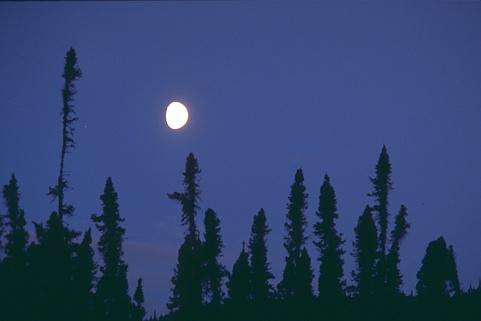

In [ ]:
filename = 'ImagensTeste/photo006.jpg'
photo = photo_open(filename)
photo

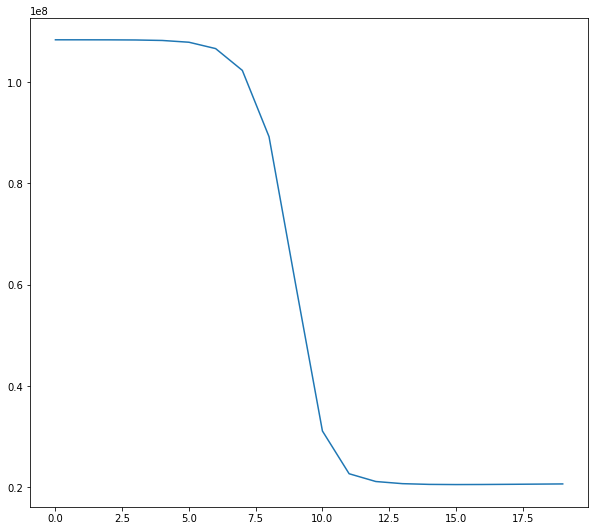

In [ ]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 4)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=20)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

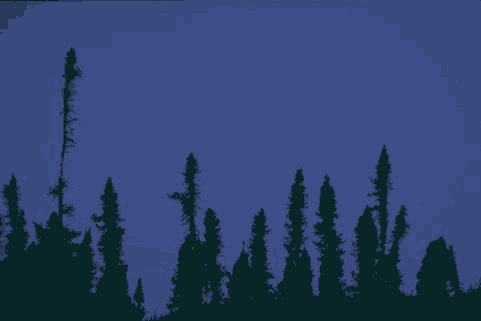

In [ ]:
photo

## Imagem 7

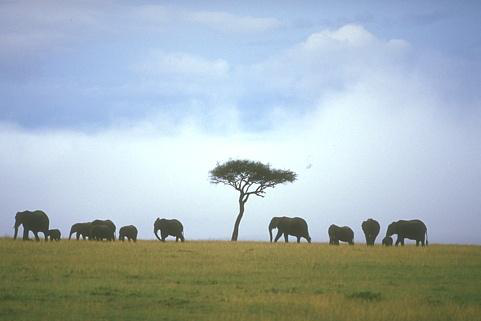

In [ ]:
filename = 'ImagensTeste/photo007.jpg'
photo = photo_open(filename)
photo

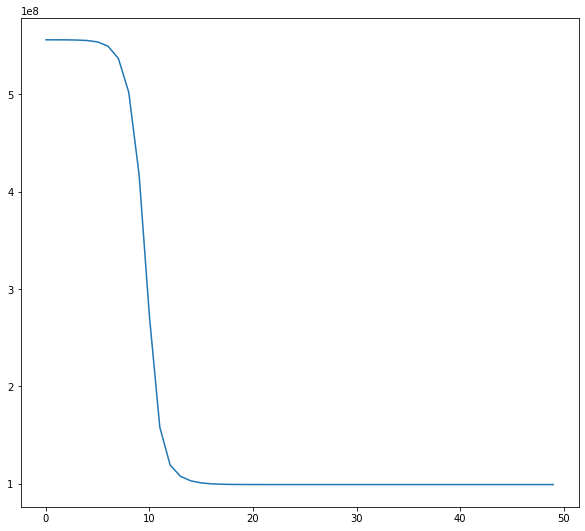

In [ ]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 3)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=50)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

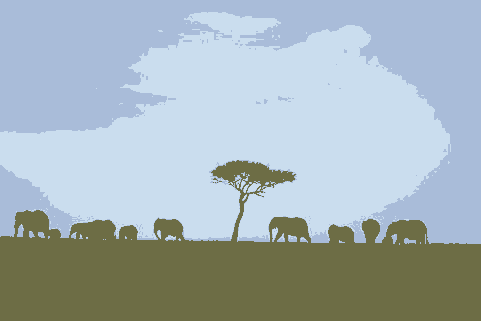

In [ ]:
photo

## Imagem 8

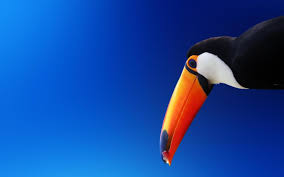

In [ ]:
filename = 'ImagensTeste/photo008.jpg'
photo = photo_open(filename)
photo

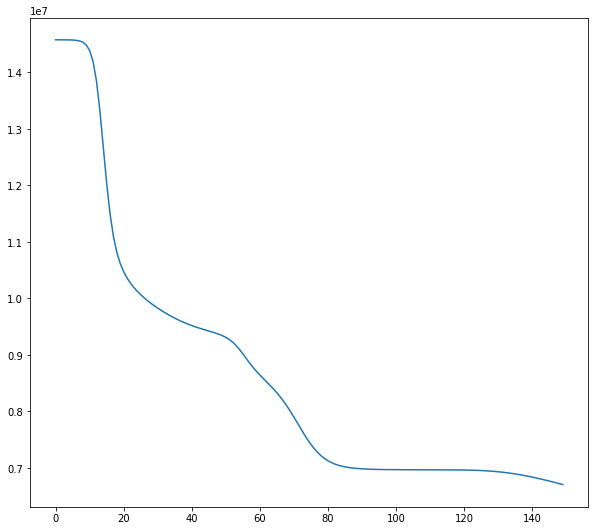

In [ ]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 30)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=150)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

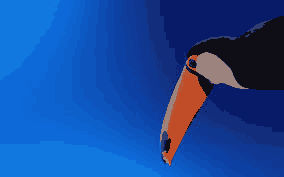

In [ ]:
photo

## Imagem 9

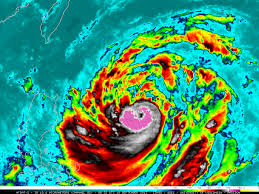

In [ ]:
filename = 'ImagensTeste/photo009.jpg'
photo = photo_open(filename)
photo

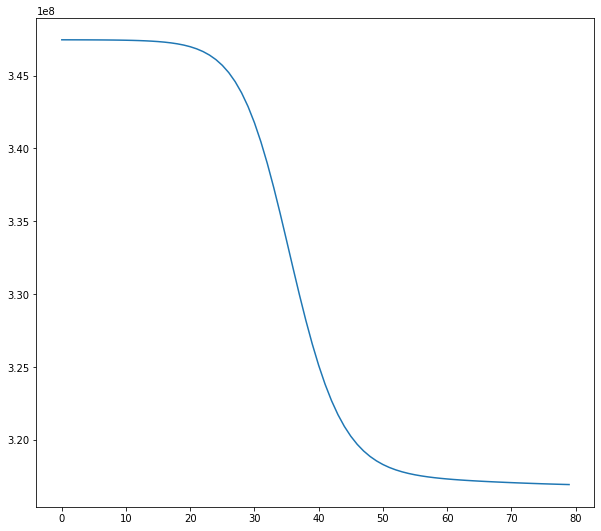

In [ ]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 3)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=80)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

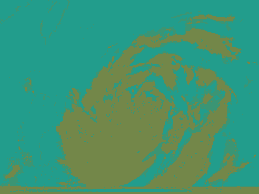

In [ ]:
photo

## Imagem 10

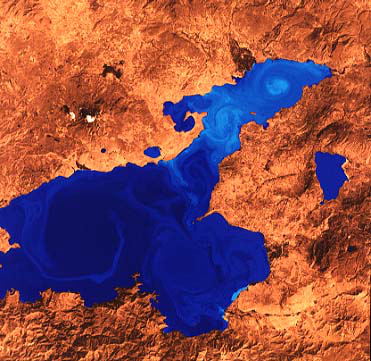

In [ ]:
filename = 'ImagensTeste/photo010.jpg'
photo = photo_open(filename)
photo

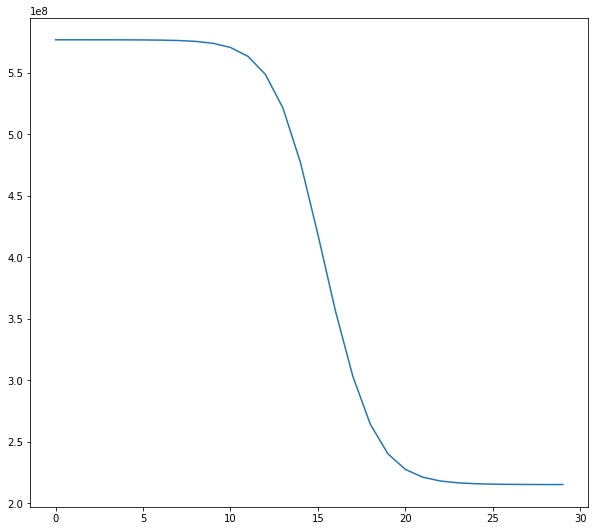

In [ ]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 3)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=30)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

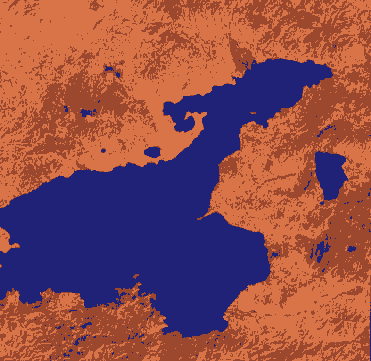

In [ ]:
photo

## Imagem 11

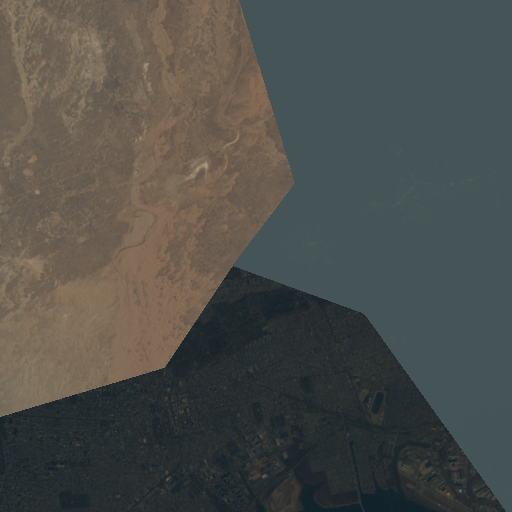

In [ ]:
filename = 'ImagensTeste/photo011.png'
photo = photo_open(filename)
photo

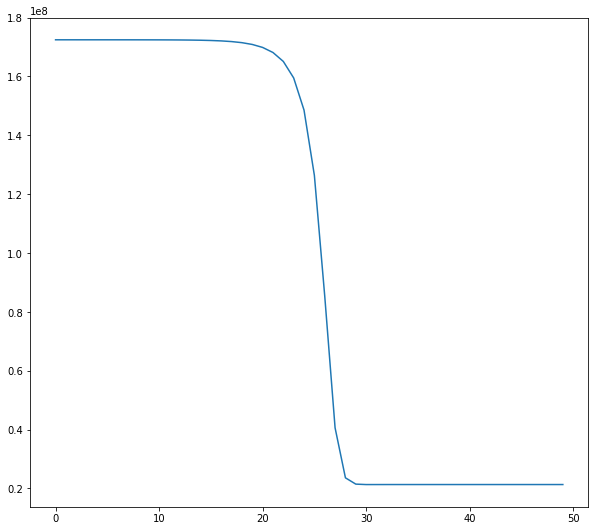

In [ ]:
pixels = pick_pixels(photo)
fuzzy_c_means = FuzzyCMeans(pixels, 3)
labels, centers, list_cost = fuzzy_c_means.fit(max_iter=50)
photo = coloring(photo, labels, centers)

plt.figure(figsize=(10, 9))
plt.plot(range(len(list_cost)), list_cost)
plt.show()

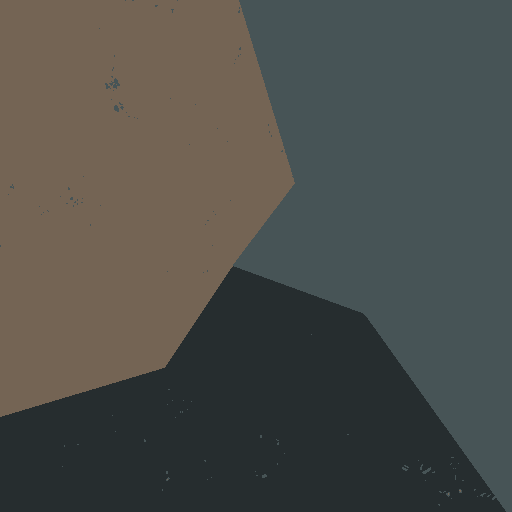

In [ ]:
photo